### Maneuvering Machine Learning Algorithms to presage the attacks of Fusarium oxysporum on Cotton Leaves

AUTHOR:  Anurag Dutta (anuragdutta.research@gmail.com)

CREATED: 2022-12-23 23:40:10

DATASET: https://github.com/Anurag-Dutta/Maneuvering-Machine-Learning-Algorithms-to-presage-the-attacks-of-Fusarium-oxysporum-on-Cotton-Leave/tree/main/dataset

### Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

### Prepare/collect data

In [2]:
import os

path = os.listdir('dataset/Training/')
classes = {'healthy':0, 'fussarium_wilt':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'dataset/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
pd.Series(Y).value_counts()

0    336
1    336
dtype: int64

In [7]:
X.shape, X_updated.shape

((672, 200, 200), (672, 40000))

### Visualize data

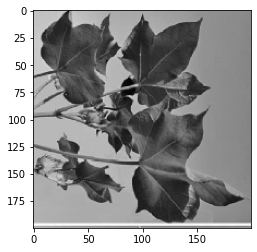

In [8]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(672, 40000)

### Split Data

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((537, 40000), (135, 40000))

### Feature Scaling

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(537, 40000) (135, 40000)


In [15]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

### Train Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [17]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [18]:
sv = SVC()
sv.fit(xtrain, ytrain)

In [ ]:
knc = KNeighborsClassifier()
knc.fit(xtrain, ytrain)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)

In [ ]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

### Evaluation

In [ ]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

In [ ]:
print("Training Score:", knc.score(xtrain, ytrain))
print("Testing Score:", knc.score(xtest, ytest))

In [ ]:
print("Training Score:", rfc.score(xtrain, ytrain))
print("Testing Score:", rfc.score(xtest, ytest))

In [ ]:
print("Training Score:", gnb.score(xtrain, ytrain))
print("Testing Score:", gnb.score(xtest, ytest))

### Prediction (SVM)

In [ ]:
from sklearn import metrics
pred = sv.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
print('Precision: ',precision)
print('Recall: ',recall)
disp = plot_precision_recall_curve(sv, xtest, ytest)
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Prediction (RF)

In [ ]:
from sklearn import metrics
pred = rfc.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
print('Precision: ',precision)
print('Recall: ',recall)
disp = plot_precision_recall_curve(rfc, xtest, ytest)
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Prediction (KNN)

In [ ]:
from sklearn import metrics
pred = knc.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
print('Precision: ',precision)
print('Recall: ',recall)
disp = plot_precision_recall_curve(knc, xtest, ytest)
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Prediction (GNB)

In [ ]:
from sklearn import metrics
pred = gnb.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
print('Precision: ',precision)
print('Recall: ',recall)
disp = plot_precision_recall_curve(gnb, xtest, ytest)
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Prediction (LR)

In [ ]:
from sklearn import metrics
pred = lg.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
print('Precision: ',precision)
print('Recall: ',recall)
disp = plot_precision_recall_curve(lg, xtest, ytest)
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### TEST MODEL

In [ ]:
dec = {0:'Healthy', 1:'Fussarium Wilt'}

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('dataset/Testing/')
c=1
for i in os.listdir('dataset/Testing/healthy/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('dataset/Testing/healthy/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('dataset/Testing/')
c=1
for i in os.listdir('dataset/Testing/fussarium_wilt/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('dataset/Testing/fussarium_wilt/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1